# Part I - Analysis of Ford GoBike System Data
## by Jonathan Akwasi Adusei

## Introduction<a id="intro"></a>
> Bike share is a convenient, healthy, low-cost, and enjoyable mode of transportation. It consists of a fleet of specially designed bikes that are docked at a network of stations. Bikes can be unlocked at any station in the system and returned to another. People use bike share to get to work or school, run errands, and get to appointments, among other things.<br>
> The data comes from Ford GoBike, a bike-sharing service. It was founded in 2013 and is based in San Francisco, California. In 2017, the system joined forces with the well-known firm Ford Motor, and they currently have roughly 3,000 bicycles and 270 stations in northern California.<br>
> For this project, the dataset comprises information about GoBike system rides and has around 1.9 million records since the fiscal year 2018. I will focus on some data from 2019. I will begin by obtaining the dataset and loading it, then continue with a preliminary assessment and cleaning. Then finally, conclude with an analysis of the data.

## Table of Content

[Introduction](#intro)<br>
[Preliminary Wrangling](#wrangle)<br>
    1. [Importing Libraries and Modules](#libraries)<br>
    2. [Loading Data](#load)<br>
    3. [Assessing Data](#assess)<br>
    4. [Cleaning Data](#clean)<br>
    4. [Storing Data](#store)<br>
[Exploration](#explore)<br>
    1. [Univariate Exploration](#univar)<br>
    2. [Bivariate Exploration](#bivar)<br>
    3. [Multivariate Exploration](#mulvar)<br>
[Conclusion](#conclusion)<br>

## Preliminary Wrangling<a id="wrangle"></a>

#### 1. Importing Libraries & Modules<a id="libraries"></a><br>
The following libraries will be needed and therefore will be imported: 
`pandas` `numpy` `matplotlib` `seaborn` `datetime`

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

#### 2. Loading Data<a id="load"></a><br>

In [2]:
# downloading the WeRateDogs Twitter archive data in a dataframe as 'archive'
bike_original = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bike_original.shape

(183412, 16)

#### 3. Assessing Data<a id="assess"></a><br>

In [4]:
bike_original.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
bike_original.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [6]:
bike_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
bike_original.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [8]:
bike_original.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
sum(bike_original.duplicated())

0

In [10]:
bike_original.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [11]:
bike_original.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
bike_original.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [13]:
# Make copy of the original data as backup

bike_copy = bike_original.copy()

# Make copy of the original data as for cleaning purposes
bike = bike_original.copy()

In [14]:
bike_copy

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [15]:
bike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


#### 4. Cleaning Data<a id="clean"></a>

##### Issue #1: Missing values in start_station_id, start_station_name, end_station_id , end_station_name, member_birth_year, member_gender columns

_Define:_ Drop rows with missing values

Code

In [16]:
bike.dropna(inplace=True)

Test

In [17]:
bike.isnull().any().sum()

0

In [18]:
bike.shape

(174952, 16)

##### Issue #2: start_time and end_time columns are in string (object)

Define: Convert the columns to datetime

Code

In [19]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

Test

In [20]:
bike['end_time'][0]

Timestamp('2019-03-01 08:01:55.975000')

##### Issue #3: bike_id in string (object)

Define: Convert the column to string(object)

Code

In [21]:
bike['bike_id'] =bike.bike_id.astype(str)

Test

In [22]:
type(bike['bike_id'][0])

str

#### 5. Storing Data<a id="store"></a>
Save cleaned master dataset to a CSV file named "201902-fordgobike-tripdata_cleaned.csv".

In [23]:
#Store the clean DataFrame in a CSV file
bike.to_csv('201902-fordgobike-tripdata_cleaned.csv', index=False, encoding = 'utf-8')

## Data Exploration<a id="explore"></a>

For this project, i will extract the day, month and year from the start and end dates into new columns

In [24]:
# extract day, month and year, start hour and end hour from the start and end dates
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_month'] = bike['start_time'].dt.month_name()
# bike['start_year'] = bike['start_time'].dt.year
bike['start_hr'] = bike['start_time'].dt.hour
bike['start_hr'] = bike.start_hr.astype(str)


bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
bike['end_hr'] = bike['end_time'].dt.hour
bike['end_hr'] = bike.end_hr.astype(str)

# bike['start_year'] = bike['start_time'].dt.year
bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,February,17,Friday,March,4


In [25]:
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
start_day                          object
start_month                        object
start_hr                           object
end_day                            object
end_month                          object
end_hr                             object
dtype: object

### What is the structure of your dataset?

> There are 183412 FordGoBike trips in the dataset with 16 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 specifications, 9 are numerical, 2 are DateTime, 4 are object types, and 1 is a boolean type. After a preliminary assessment, about 4.6% of the dataset had missing values in some columns that are of interest to this analysis and were consequently dropped, leaving 174952 rides.

### What is/are the main feature(s) of interest in your dataset?

> I am most curious to learn
> 1. How trip duration is affected by other variables in the dataset?
> 2. What is the average duration of trips?
> 3. What time of the day, day of the week and month were most trips taken?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some features in the dataset that used in my investigations include: Trip Duration (seconds), Start Time and Date, End Time and Date, User Type, Member Year of Birth, Member Gender Trip Duration (seconds), Start Time and Date, End Time and Date, User Type, Member Year of Birth, Member Gender

## 1. Univariate Exploration<a id="univar"></a><br>
> In this section, I investigate distributions of individual variables.

##### What is the average trip duration?

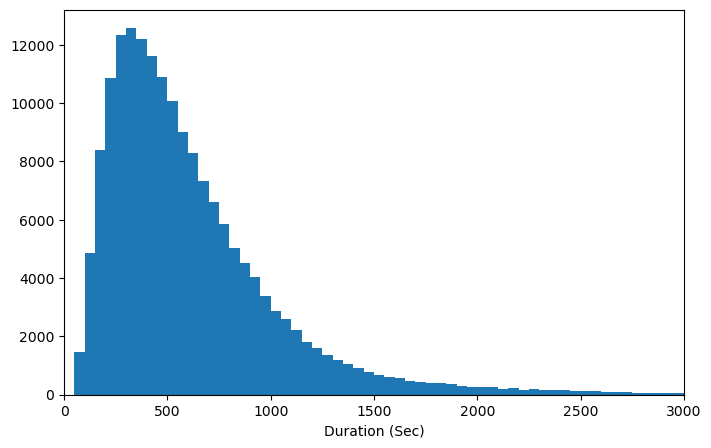

In [26]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(50, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([0, 3000]);

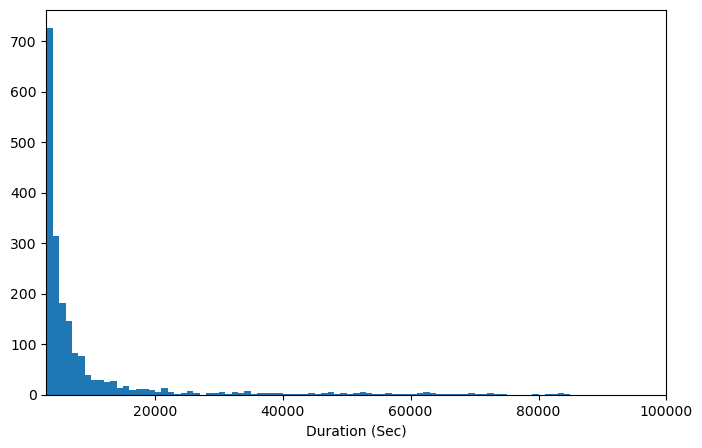

In [27]:
# the tail part of the distribution
binsize = 1000
bins = np.arange(3000, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([3000, 100000]);

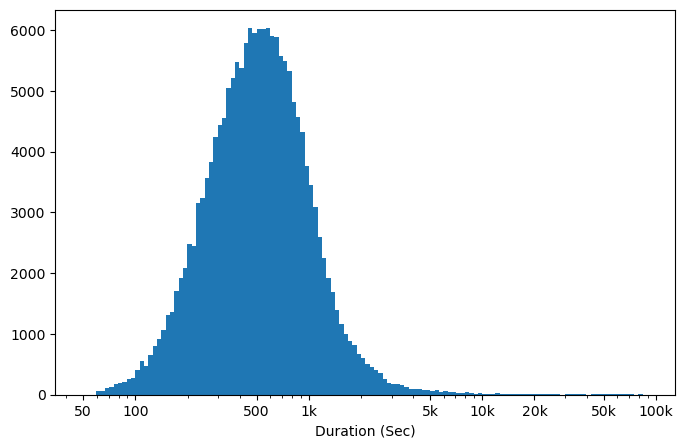

In [28]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins=bins)
plt.xscale('log')
# plt.xlim([0,3000])
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)');

The distribution of duration is long-tailed, with many trips on the short end (200-1000 secs) and few on the long end. It has a peak of around 500 seconds and a smooth fall until around 10,000 seconds. Following that, there are fewer longer durations with gaps in between.

##### How many trips in a week?

In [29]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

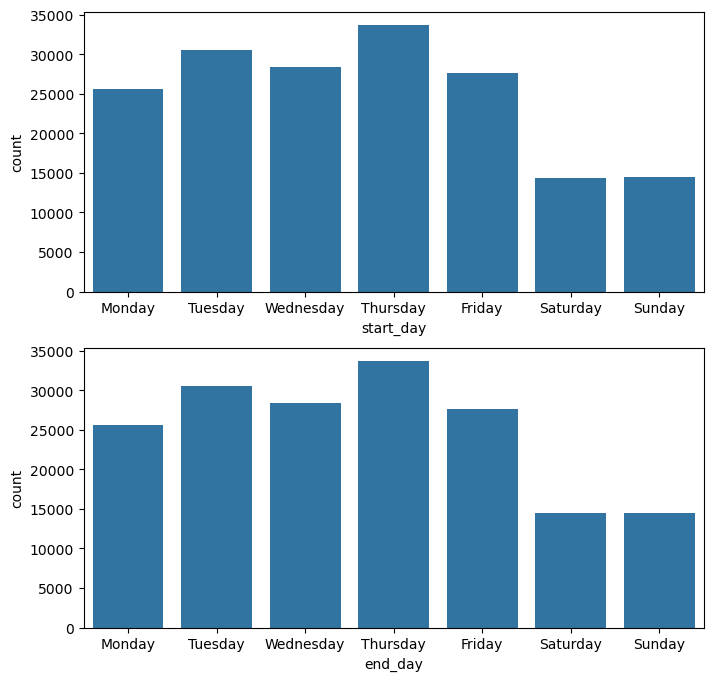

In [30]:
# ride frequency per days

fig, ax = plt.subplots(2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'start_day', color = default_color,  ax = ax[0])
sb.countplot(data = bike, x = 'end_day', color = default_color,  ax = ax[1]);

The majority of the trips (start and end dates) occurred on Thursdays, followed by Tuesdays, Fridays, Wednesdays, and Mondays. Weekends (Saturdays and Sundays) have the fewest number of trips.

##### Which hours of the day recorded the most trips?

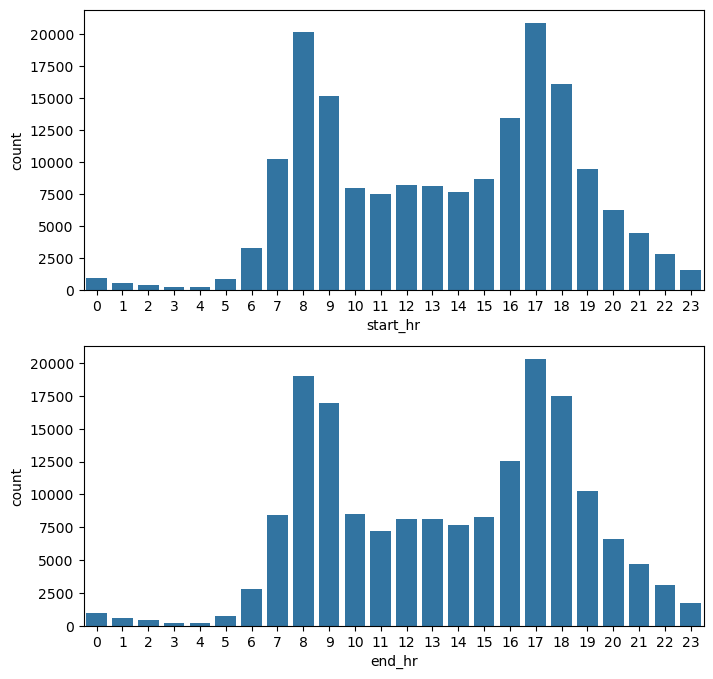

In [31]:
# ride frequency per hours

fig, ax = plt.subplots(2,figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'start_hr', color = default_color,  ax = ax[0])
sb.countplot(data = bike, x = 'end_hr', color = default_color, ax = ax[1]);

The 8th, 9th, 17th, and 18th hours have the highest trip records for the days. This is to be expected, as it is related to the morning rush and the end of the workday. The number of trips is lowest in the third and fourth hours.

##### What month had the most trips?

['174938 (99.992%)', '14 (0.008%)']

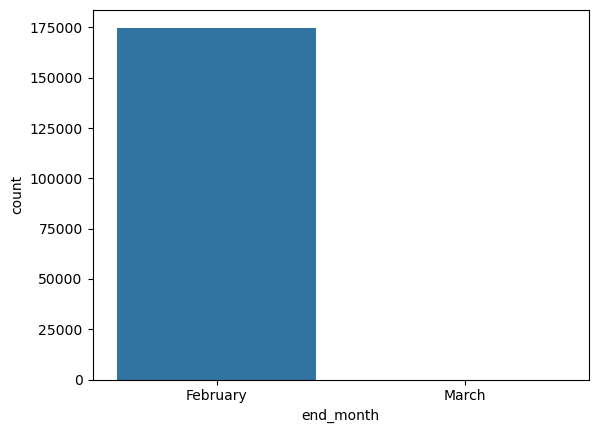

In [32]:
# trip end frequency per day

sb.countplot(x=bike['end_month'],
                   order=bike['end_month'].value_counts(ascending=False).index);
        
abs_values = bike['end_month'].value_counts(ascending=False)
rel_values = bike['end_month'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.3f}%)' for p in zip(abs_values, rel_values)]
lbls
# ax.bar_label(container=ax.containers[0], labels=lbls)

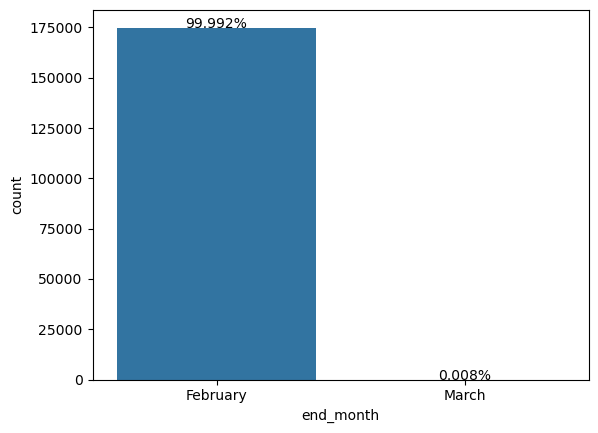

In [33]:
# trip end frequency per day

ax = sb.countplot(data = bike, x = 'end_month',  color=sb.color_palette()[0], order=bike.end_month.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

Almost all (99.99%) of the trips happened within the month of Februry.

##### What user type is most common?

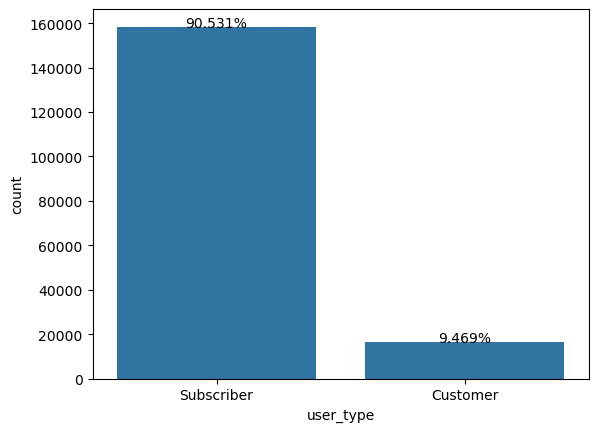

In [34]:
# ride frequency per user type
ax = sb.countplot(data = bike, x = 'user_type',  color=sb.color_palette()[0], order=bike.user_type.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

Of the analysed rides, 90.5% were subscribers and the remaining being customers.

##### What gender is common among the users?

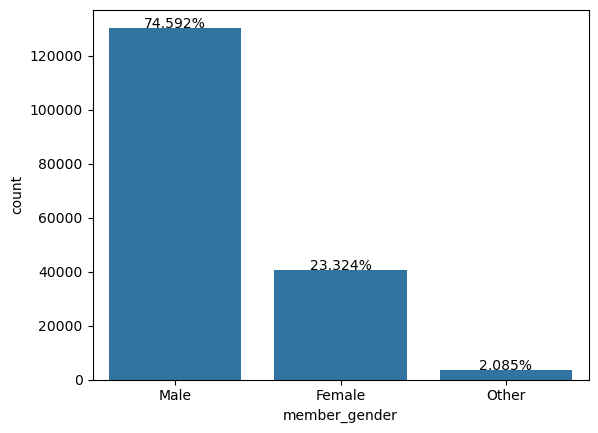

In [35]:
# ride frequency per gender
ax = sb.countplot(data = bike, x = 'member_gender',  color=sb.color_palette()[0], order=bike.member_gender.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

Males were the largest users of the bike-share services with 75.59%, while 23.32% were females.

##### What is the age characteristic of user?

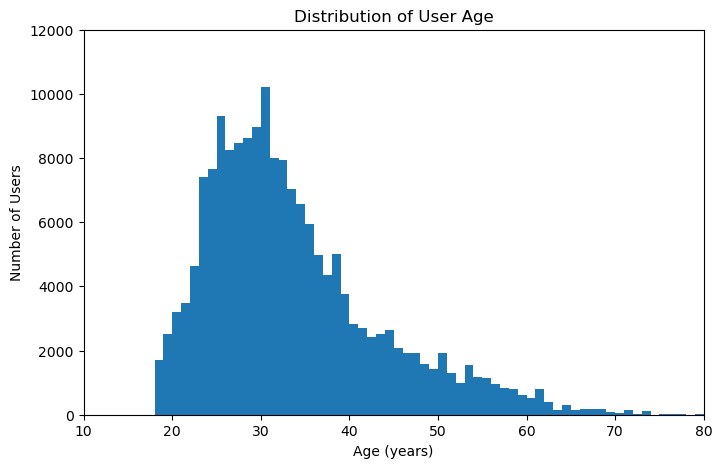

In [36]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, bike['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

The age distribution is more concentrated between 20 to 40 years old.

##### What is the distritions rides per bike share for all trip and user type?

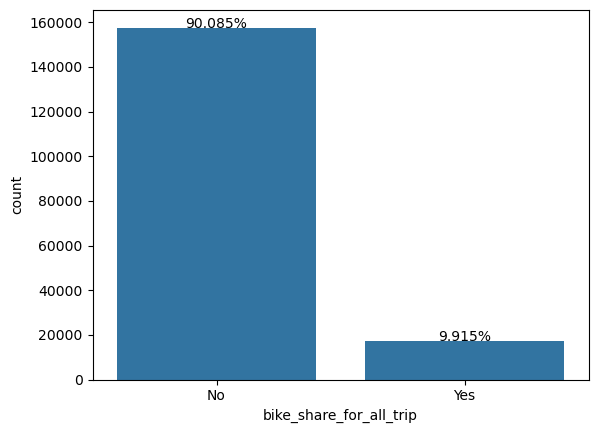

In [37]:
# ride frequency per bike_share_for_all_trip
ax = sb.countplot(data = bike, x = 'bike_share_for_all_trip',  color=sb.color_palette()[0],
                  order=bike.bike_share_for_all_trip.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

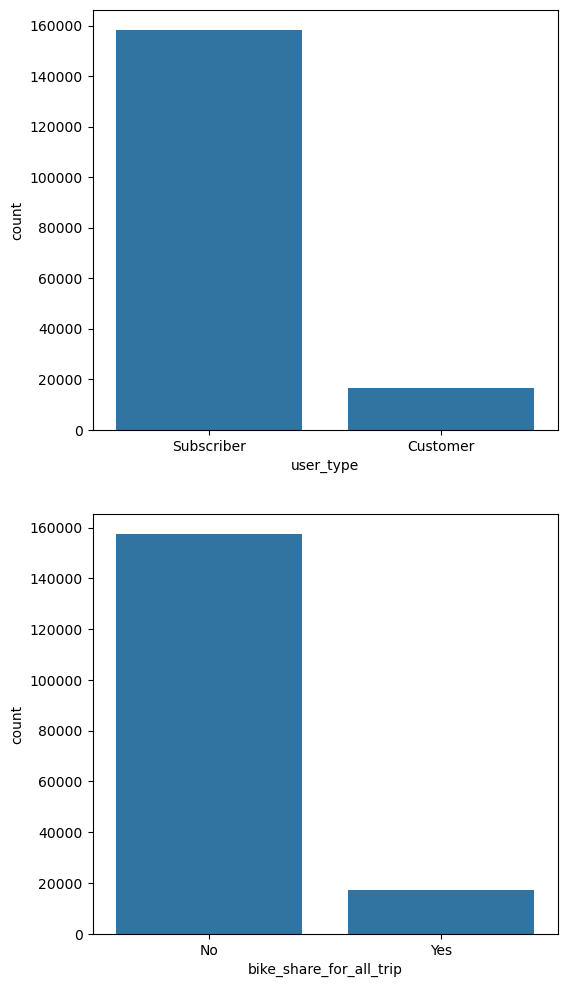

In [38]:
fig, ax = plt.subplots(2,figsize = [6,12])

default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'user_type', color = default_color, order=bike.user_type.value_counts().index, ax = ax[0])
sb.countplot(data = bike, x = 'bike_share_for_all_trip',  order=bike.bike_share_for_all_trip.value_counts().index,
             color = default_color, ax = ax[1]);

There are approximately 90% more subscribers than normal customers, and approximately 90% more non-bike sharing for all trips than bike sharing for all trips.

##### What are the top ten (10) most popular start and end stations

In [39]:
# top 10 most popular start stations
bike.start_station_name.value_counts().head(10)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

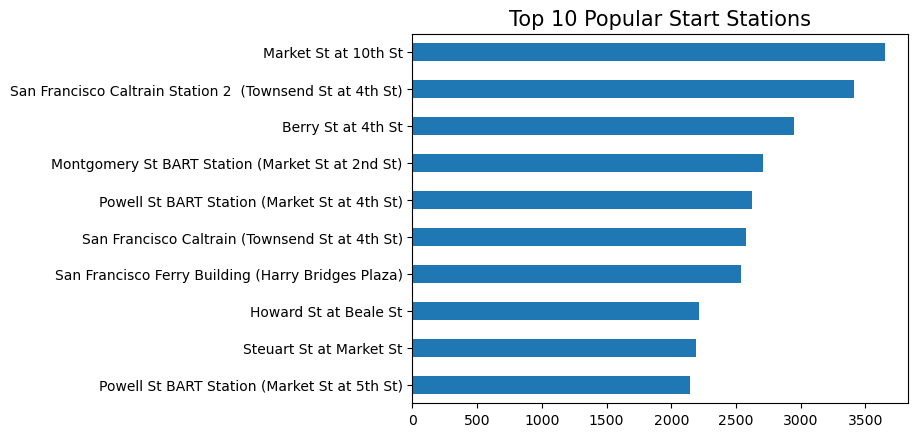

In [40]:
# plotting top 10 most popular start stations 
plt.title('Top 10 Popular Start Stations', fontsize=15)
bike.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

In [41]:
# top 10 popular end stations
bike.end_station_name.value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

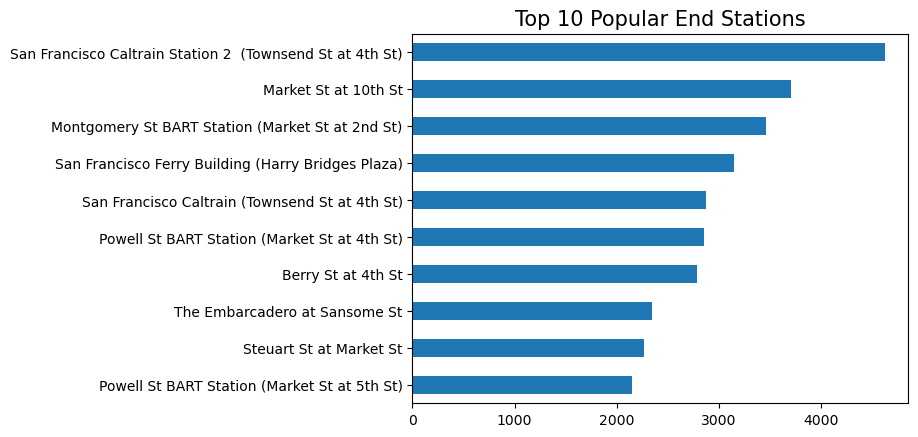

In [42]:
# plotting the top 10 popular end station
plt.title('Top 10 Popular End Stations', fontsize=15)
bike.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

Market St at 10th St and San Francisco Caltrain Station 2  (Townsend St at 4th St) were the top-most frequently used start and end stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Some features had long-tailed, skewed distributions, which were investigated on a log-scale, revealing the hidden distribution in some areas. Because the trip duration has a large number of values and is concentrated to a tail, I examined it using log transform.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The birth year is converted by subtracting the year from the current year, yielding a distribution for age; this action is carried out because age provides a better perception of trip duration dependency. Also, the start and end stations are plotted in a larger plot to provide a better understanding of bike traffic at specific stations.

## 2. Bivariate Exploration<a id="bivar"></a><br>

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

##### What is the relation between trip duration and age?

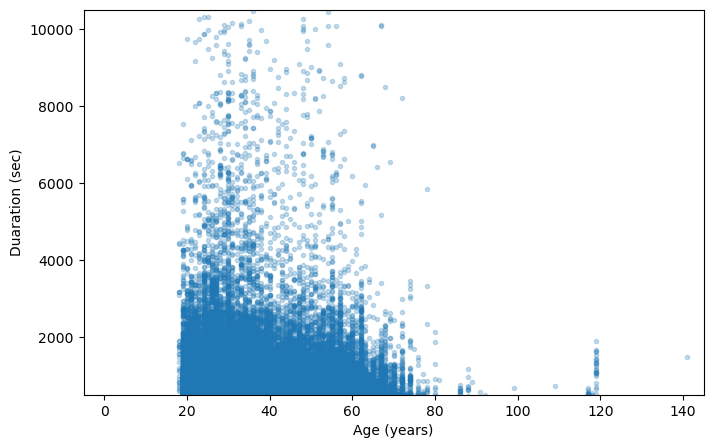

In [43]:
plt.figure(figsize=[8,5])
plt.scatter((2019 - bike['member_birth_year']), bike['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()

Because the majority of the durations and ages are less than 6000 and 80, I will crop the plot until those values are met.

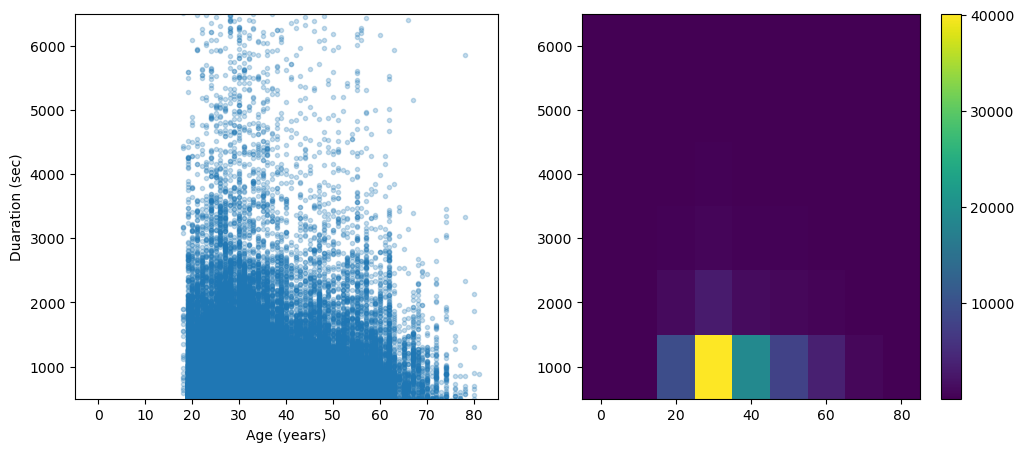

In [44]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - bike['member_birth_year']), bike['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - bike['member_birth_year']), bike['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

Based on these figures above, we can conclude that the majority of bike users are between the ages of 20 and 45. Younger members have a longer duration.

##### What is the distribution of trip duration between user types, member gender and bike sharing status?

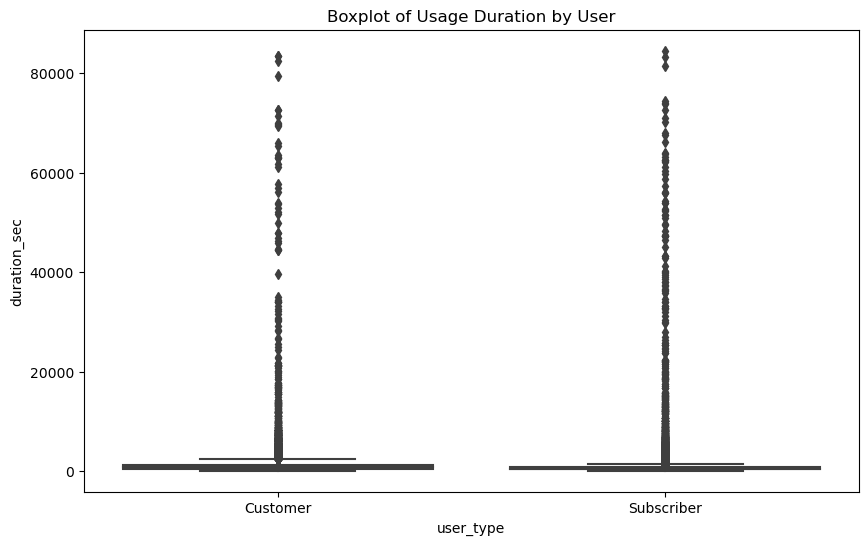

In [45]:
# box ploting trip duration against user type 
plt.figure(figsize=(10,6))
plt.title('Boxplot of Usage Duration by User')
sb.boxplot(data=bike, x='user_type', y='duration_sec');

Because the values are very spread out, I will limit the duration to a maximum of 3000 seconds to get a clearer picture of the boxplots above.

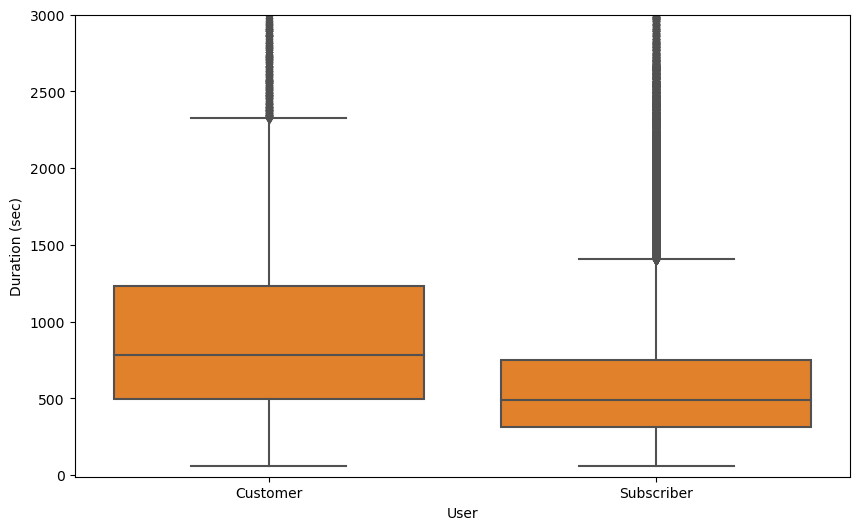

In [46]:
# boxplotting user type and trip duration with upper y-limit set at 3000
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[1]
sb.boxplot(data = bike, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.xlabel('User')
plt.ylabel('Duration (sec)')
plt.show()

When compared to subscribers, a higher percentage of customers take longer trips.

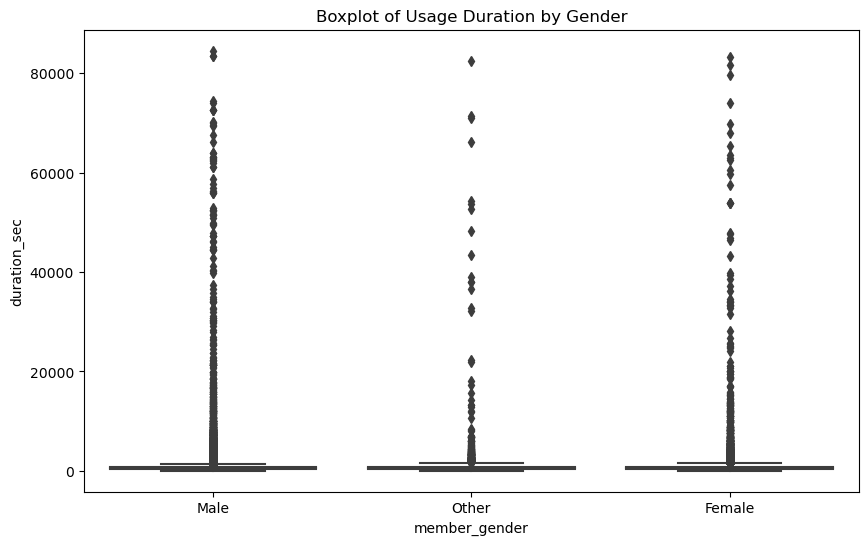

In [47]:
# box plotting trip duration with gender of riders
plt.figure(figsize=(10,6))
plt.title('Boxplot of Usage Duration by Gender')
sb.boxplot(data=bike, x='member_gender', y='duration_sec');

Because the values are very spread out, I will limit the duration to a maximum of 2000 seconds to get a clearer picture of the boxplots above.

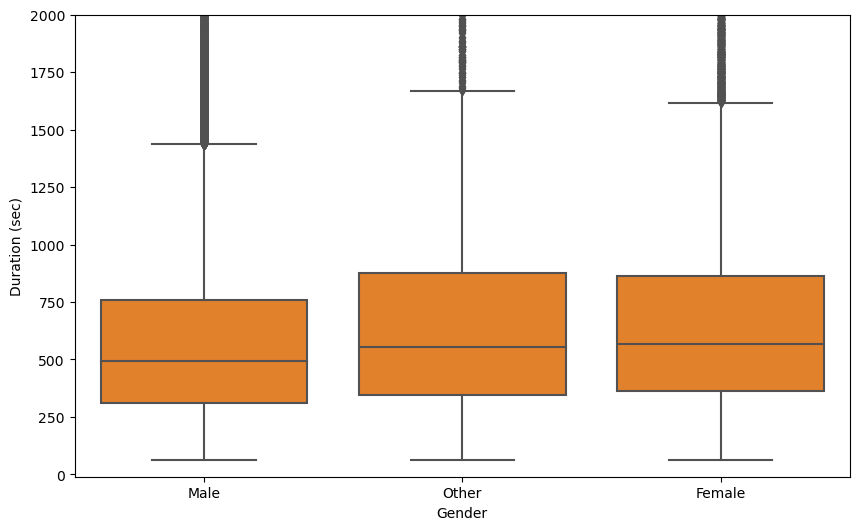

In [48]:
# boxplotting member gender and trip duration with upper y-limit set at 2000
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[1]
sb.boxplot(data = bike, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

Despite the fact that the number of male riders is significantly higher than that of others and females, we can see that a higher percentage of females and other riders ride longer distances than males.

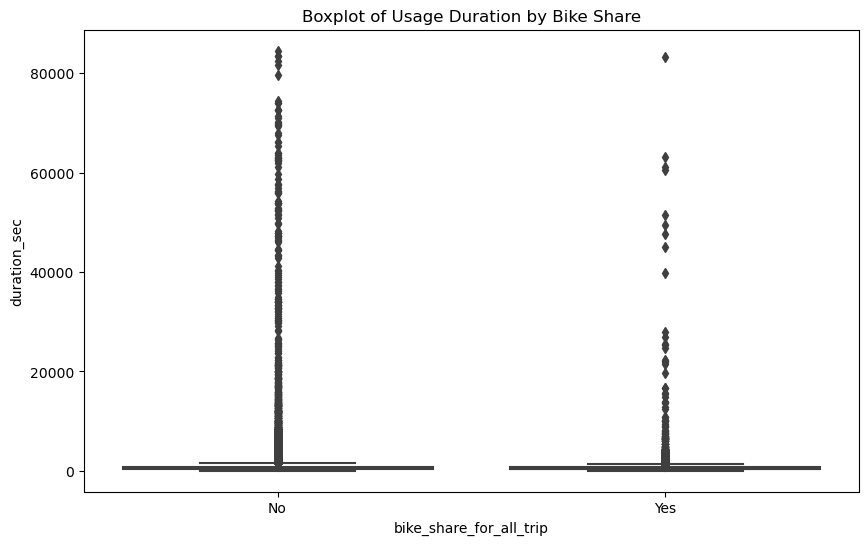

In [49]:
# box plotting trip during and bike share status

plt.figure(figsize=(10,6))
plt.title('Boxplot of Usage Duration by Bike Share')
sb.boxplot(data=bike, x='bike_share_for_all_trip', y='duration_sec');

The trip durations will be trimmed to a maximum of 2000 seconds to provide a clearer picture when viewing a box plot.

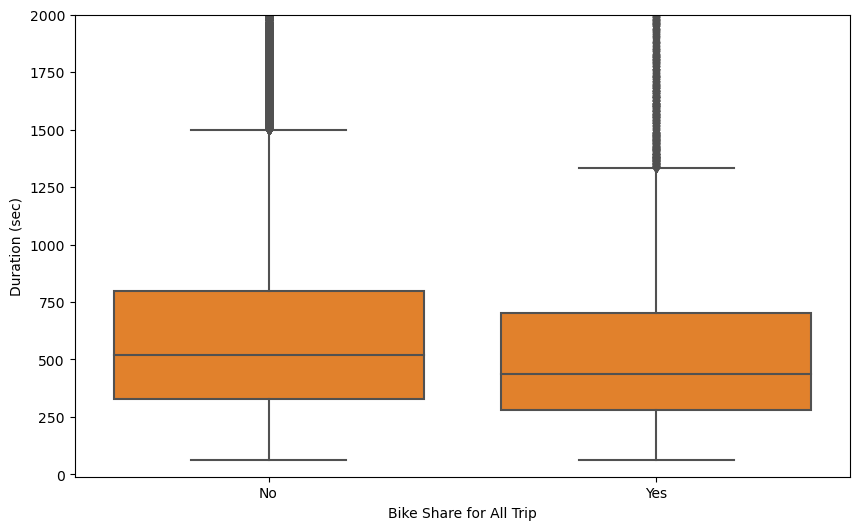

In [50]:
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[1]
sb.boxplot(data = bike, x = 'bike_share_for_all_trip', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Duration (sec)')
plt.show()

It is observed that non-bike share users tend to spend more time on trips than bike share users.<br>

It appears that customers spend more time on average compared to subscribers while the female gender spends higher time on average than males. Bike share for all trips tends to be similar on average across all types.

##### What is the relationship between user type: and (a) member gender; (b) bike sharing status; (c) trip starts days?

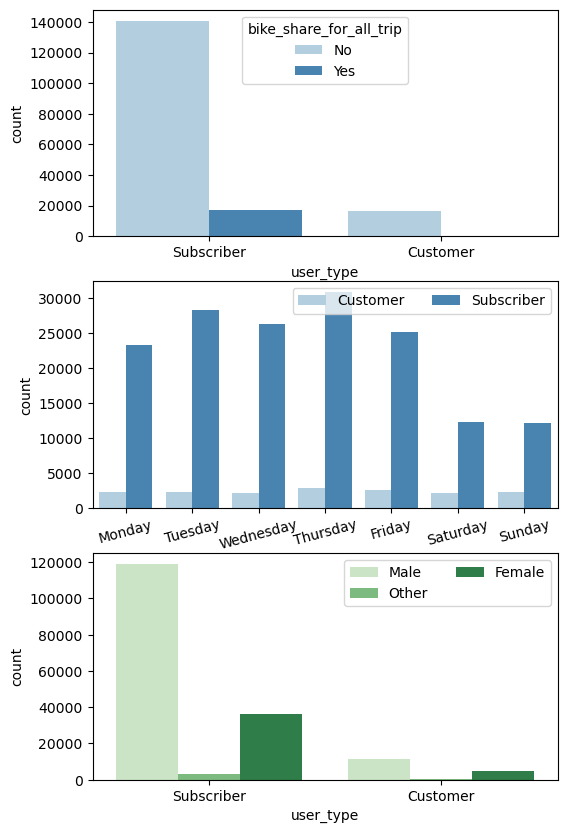

In [51]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [6, 10])

# subplot 1: user_type vs bike_share_for_all_trip
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'bike_share_for_all_trip', order=bike.user_type.value_counts().index,
             palette = 'Blues')

# subplot 2: end_day vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'start_day', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=15)

# subplot 3: user_type vs. member_gender, 
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender',order=bike.user_type.value_counts().index,
             palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()

It can be deduced that bike sharing is only available to subscribers and that customer type has no effect on the number of trips on any given weekday. Similarly, member gender does not affect the user type of bike-share patrons.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip duration is heavily dependent on the age of the member, which surprised me. It is clear that bike sharing is only available to subscribers, and that customer type has no bearing on the number of trips taken on any given weekday. Similarly, gender has no effect on the type of bike-share user. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I anticipated variables like user type and gender values to have a higher value to have a longer trip duration. Contrarily, among the genders, male riders have a high value for trip duration, and trips among female riders average longer duration.

## 3. Multivariate Exploration<a id="mulvar"></a><br>

> Here I create plots of three or more variables to investigate my data even
further.

##### Distribution trip duration across days and customer types.

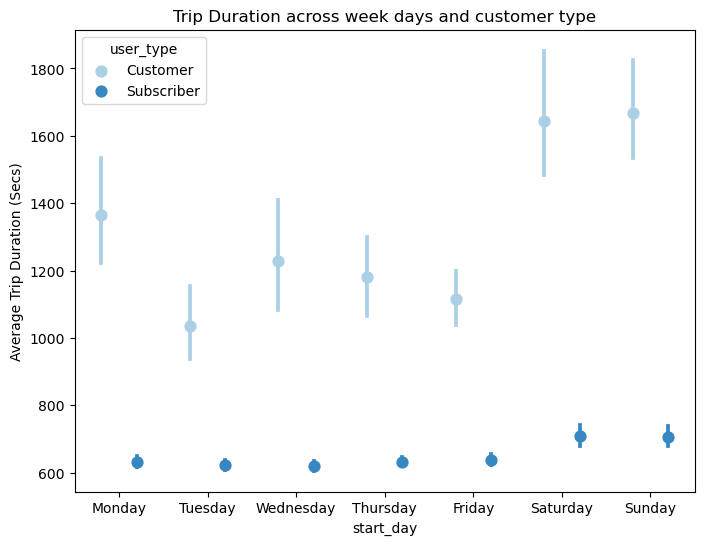

In [52]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across week days and customer type')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

Customers travel a long distance no matter the day of the week, with the longest journeys occurring on weekends. Subscribers, on the other hand, typically travel a short distance with little increase on weekends, but not to the same extent as customers.

##### Distribution trip duration across gender and bike share stutus.

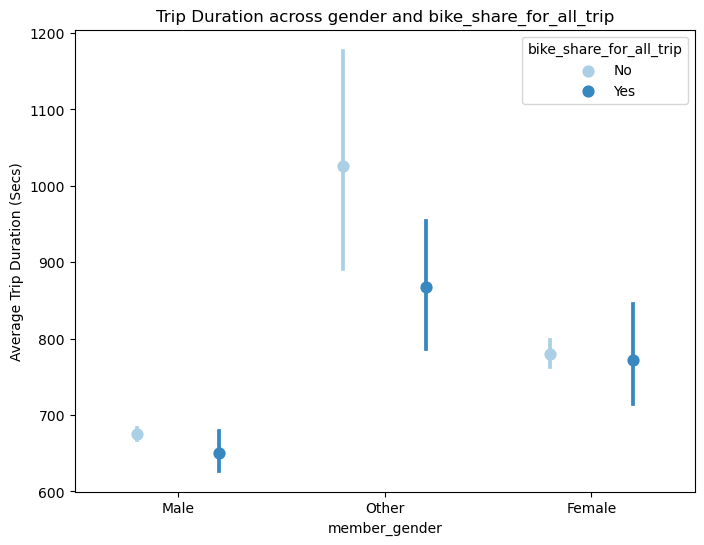

In [53]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

The other gender group travels the longest distance for both bike sharing and non-bike sharing, followed by females and then males.

##### Distribution trip duration across gender and customer types.

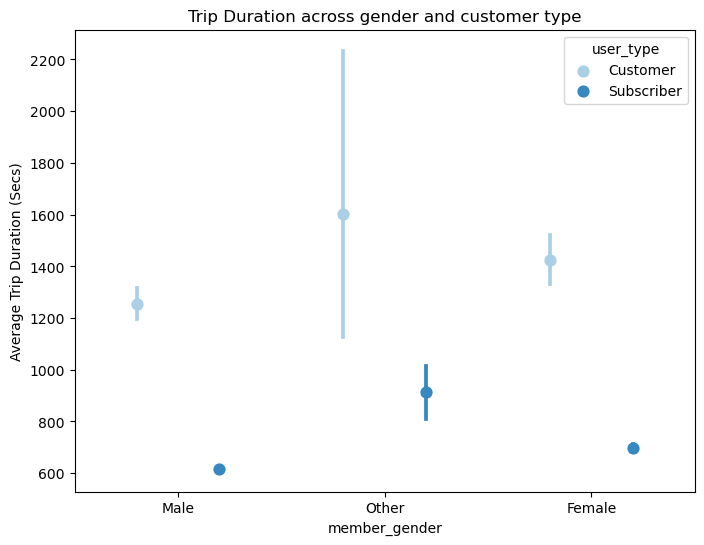

In [54]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

The other gender group travels for the longest duration for bike sharing and non-bike sharing, followed by females, then males.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For both bike sharing and non-bike sharing, the other gender group travels the greatest distance, followed by females and then males. Customers travel a long distance every day of the week, with the longest journeys taking place on weekends. On weekends, subscribers typically travel a short distance with little increase, but not to the same extent as customers.

### Were there any interesting or surprising interactions between features?

> Strikingly, the trip duration spent by the 'other' gender group was observed to be longer than the conventional gender groups.

## Conclusions<a id="conclusion"></a>

After analysing the dataset which covers the months of February and March 2019, the following conclusions were drawn. 
1.	The age distribution is more concentrated between the ages of 20 and 40. 
2.	The most frequently used start and end stations were Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St).
3.	The majority of trips were taken on Thursdays and Tuesdays and the least trips occurred on weekends. However, weekend trip durations were longer than weekday trip durations. 
4.	The peak hours are when going to work in the morning (8 and 9 a.m.) and closing in the evening (17 and 18 p.m.). 
5.	Subscribers took approximately 90% of the trips. For all trips, bike sharing accounted for less than 10% of total trips. 
6.	Males made up the majority of the trips (more than 70%), yet females spent more time on their trips than males. 
7.	Only subscribers are permitted to ride together on trips. 
8.	The number of trips per weekday is not affected by customer type. 
9.	When compared to subscribers, customers travel for longer periods of time regardless of the day of the week.